In [86]:
from google.colab import files

# upload files from the local system
uploaded = files.upload()

Saving Iris.csv to Iris (4).csv


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


Load and Explore the Data

In [88]:
import pandas as pd
df = pd.read_csv('Iris.csv')

In [89]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Preprocess the Data

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
# Drop ID Column
df = df.drop('Id', axis=1)

In [92]:
#Encode Species
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [93]:
#Spilt features and target
X = df.drop('Species', axis = 1)
y = df['Species']

Train-Test Split data

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a model

In [95]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the Model

In [96]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report: \n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 1.0

 Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Hyperparameter Tuning

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3,5,None]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 3, 'n_estimators': 50}


Save the Model

In [98]:
import joblib
joblib.dump(model, 'iris_model.pkl')

['iris_model.pkl']

Predicting a New Flower

In [99]:
# Example input: a new flower
new_flower = [[5.1, 3.5, 1.4, 0.2]]  # 2D array: 1 sample × 4 features [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]

# Predict the class
predicted_class = model.predict(new_flower)

# Convert class number back to species name
predicted_species = le.inverse_transform(predicted_class)

print("Predicted species:", predicted_species[0])

Predicted species: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Visualize Decision Boundaries

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


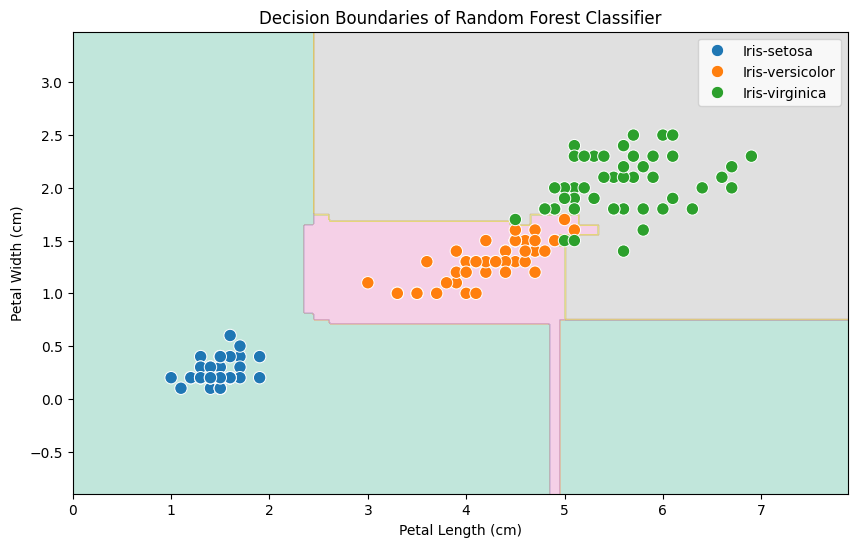

In [100]:
# Only use two features for 2D visualization
X = df[['PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Plotting the decision boundaries
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Set2')
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=le.inverse_transform(y), s=80)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()
